In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px

In [2]:
df = pd.read_csv('Life_Expectancy_00_15.csv', sep = ';')

##### Verificando se os dados estão com informações coerentes com as colunas

In [4]:
display(df)

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Zimbabwe,2011,Africa,False,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
1900,Zimbabwe,2012,Africa,False,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
1901,Zimbabwe,2013,Africa,False,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
1902,Zimbabwe,2014,Africa,False,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


##### Analisando os tipos de dados 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least Developed                                      1904 non-null   bool   
 4   Life Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2 emissions                                        1904 non-null   float64
 7   Health expenditure                                   1904 non-null   float64
 8   Electric power consumption                           1904 non-null  

##### Contagem de valores nulos no dataset

In [5]:
df.isnull().sum()

Country                                                0
Year                                                   0
Continent                                              0
Least Developed                                        0
Life Expectancy                                        0
Population                                             0
CO2 emissions                                          0
Health expenditure                                     0
Electric power consumption                             0
Forest area                                            0
GDP per capita                                         0
Individuals using the Internet                         0
Military expenditure                                   0
People practicing open defecation                      0
People using at least basic drinking water services    0
Obesity among adults                                   0
Beer consumption per capita                            0
dtype: int64

### Life Expectancy x CO2 emissions

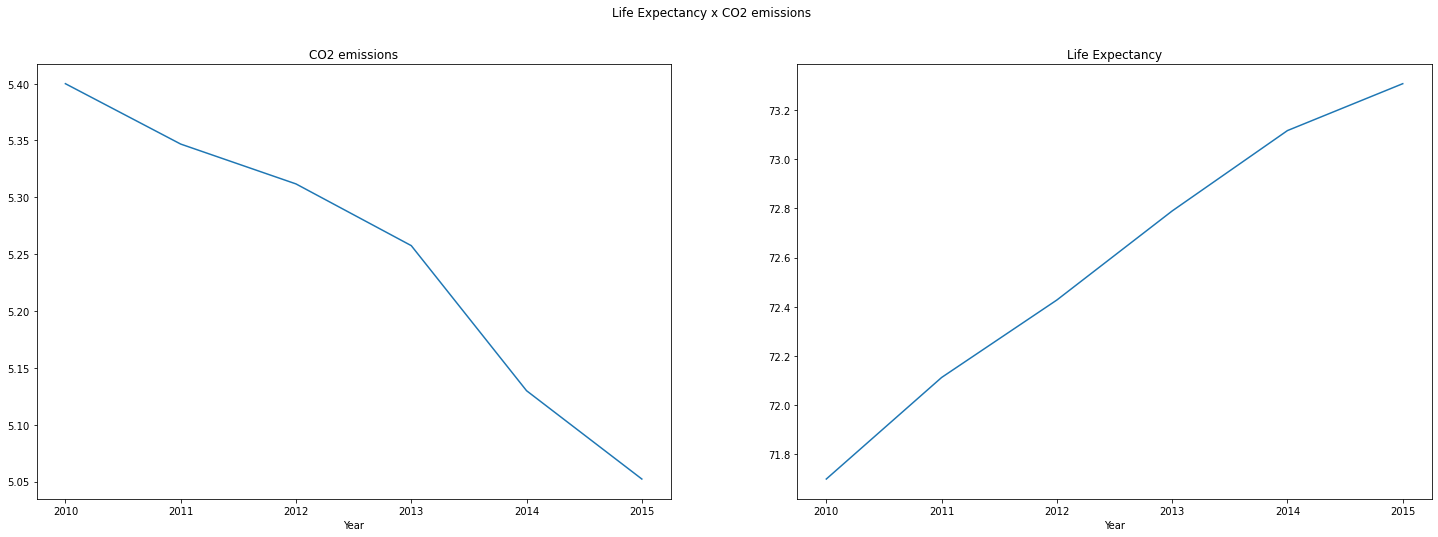

In [4]:
# Pandas plot

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

df2 = df[df['Year'] >= 2010]

df2_life_expectancy = df2[['Year', 'Life Expectancy']].groupby(['Year']).mean().reset_index()
df2_co2 = df2[['Year', 'CO2 emissions']].groupby(['Year']).mean().reset_index()


df2_life_expectancy.plot(ax = ax2, x = 'Year', 
                         y = 'Life Expectancy', kind = 'line',
                         title = 'Life Expectancy',
                         legend = False)

df2_co2.plot(ax = ax1, x = 'Year', 
                          y = 'CO2 emissions', kind = 'line', 
                          title = 'CO2 emissions', 
                          legend = False)

plt.suptitle('Life Expectancy x CO2 emissions')
plt.show()


For this part of the exploratory analysis, we first filtered the original data, eliminating information from years before 2010, and then calculated the average annual life expectancy and CO2 emissions for all countries. The objective of this analysis is to show that the average life expectancy worldwide increased as the CO2 emission was reducing.

### CO2 emissions - BR x EUA x CN

[Text(0, 0, '2.03'),
 Text(0, 0, '2.12'),
 Text(0, 0, '2.28'),
 Text(0, 0, '2.42'),
 Text(0, 0, '2.52'),
 Text(0, 0, '2.37')]

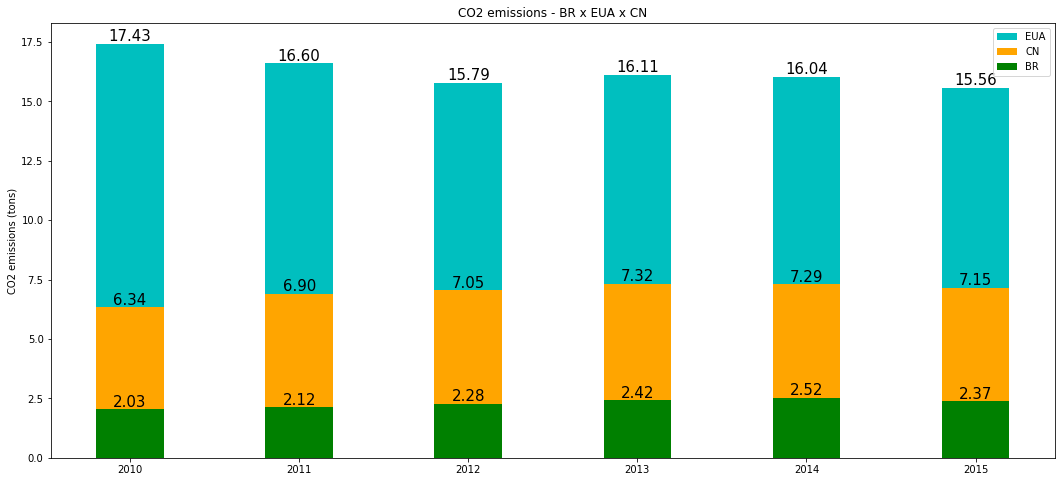

In [5]:
# matplotlib

df2_brazil = df2[df2['Country'] == 'Brazil']
df2_brazil = df2_brazil['CO2 emissions']

df2_eua = df2[df2['Country'] == 'United States']
df2_eua = df2_eua['CO2 emissions']

df2_china = df2[df2['Country'] == 'China']
df2_china = df2_china['CO2 emissions']

years = list(df2['Year'].unique())
y = np.arange(len(years))
width = 0.4

fig, ax = plt.subplots(figsize = (18,8))

data1 = ax.bar(y, df2_eua, width, label = 'EUA', color = 'c')
data2 = ax.bar(y, df2_china, width, label = 'CN', color = 'orange')
data3 = ax.bar(y, df2_brazil, width, label = 'BR', color = 'green')

ax.set_title('CO2 emissions - BR x EUA x CN')
ax.set_ylabel('CO2 emissions (tons)')
ax.set_xticks(y, years)
ax.legend(loc = 'upper right')
    

ax.bar_label(data1, fmt = '%.2f', fontsize = 15)
ax.bar_label(data2, fmt = '%.2f', fontsize = 15)
ax.bar_label(data3, fmt = '%.2f', fontsize = 15)


### Life Expectancy - EUA x BR

[Text(0, 0, '73.62'),
 Text(0, 0, '73.92'),
 Text(0, 0, '74.21'),
 Text(0, 0, '74.48'),
 Text(0, 0, '74.75'),
 Text(0, 0, '74.99')]

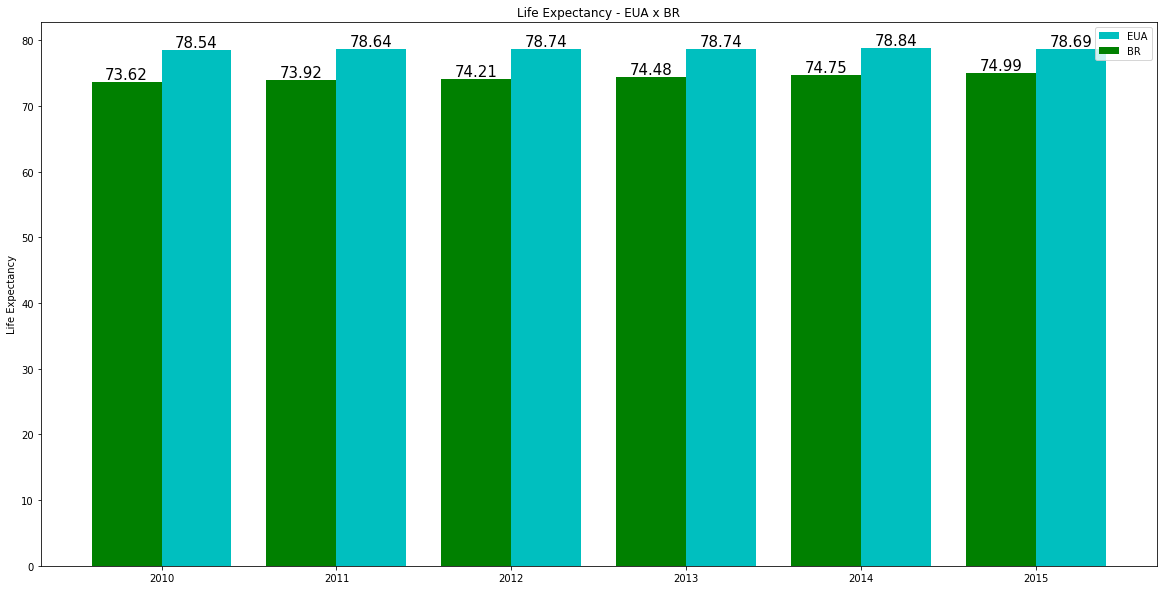

In [14]:
# matplotlib

df2_br = df2[df2['Country'] == 'Brazil']
df2_br = df2_br['Life Expectancy']

df2_eua = df2[df2['Country'] == 'United States']
df2_eua = df2_eua['Life Expectancy']

years = list(df2['Year'].unique())
y = np.arange(len(years))
width = 0.4

fig, ax = plt.subplots(figsize = (20,10))

data1 = ax.bar(y + width/2, df2_eua, width, label = 'EUA', color = 'c')
data2 = ax.bar(y - width/2, df2_br, width, label = 'BR', color = 'green')

ax.set_title('Life Expectancy - EUA x BR')
ax.set_ylabel('Life Expectancy')
ax.set_xticks(y, years)
ax.legend(loc = 'upper right')

ax.bar_label(data1, fmt = '%.2f', fontsize = 15)
ax.bar_label(data2, fmt = '%.2f', fontsize = 15)


For the graphics generated with matplotlib, a comparison was made between the United States, China, and Brazil in relation to the level of CO2 emission, showing that the U.S. is the country that emits the most CO2, then the comparison of life expectancy between Brazil and the United States serves to show that although the average CO2 emissions have reduced over the years and life expectancy has increased, it does not mean that this is directly related to CO2 emission.

### CO2 emissions x GDP per capita

In [7]:
# handling data

df2_low_expectancy = df2[df2['Year'] ==2015].sort_values(by = ['Life Expectancy'])[:5]
df2_low_expectancy['Life exp Classification'] = 'low'

df2_high_expectancy = df2[df2['Year'] ==2015].sort_values(by = ['Life Expectancy'],ascending = False)[:5]
df2_high_expectancy['Life exp Classification'] = 'high'

df2_expectancy = pd.merge(df2_low_expectancy, df2_high_expectancy, how = 'outer')
df2_expectancy = df2_expectancy[['Country', 
                                 'Life Expectancy', 
                                 'GDP per capita', 
                                 'People practicing open defecation', 
                                 'Health expenditure', 
                                 'CO2 emissions', 
                                 'Population', 
                                 'Life exp Classification']]


In [16]:
# Plotly

fig = px.bar(df2_expectancy, x='Country', y='GDP per capita',
             hover_data=['Population',
                         'People practicing open defecation',
                         'Health expenditure',
                         'CO2 emissions',
                         'Life Expectancy', 
                         'Life exp Classification'], 
             color='CO2 emissions',
             title = 'CO2 emissions x GDP per capita',
             height=500)

fig.update_layout(title_x = 0.5)
fig.show()

For the graphs generated with Plotly, initially there was a filtering in the data, selecting only the year 2015 and then the 5 countries with lower life expectancy and 5 with higher expectancy, being compared the GDP per capita against CO2 emissions, aiming to show that there is a strong correlation between these indices, in addition, we also see that countries with lower GDP in this comparison, suffer not only with low life expectancy, but also with the lack of basic sanitation in most cities, causing the rate of people defecating in the open to be very high in relation to countries with higher GDP, considering that the index of the 5 largest is zero, although it does not have a very strong correlation between them, when we analyze the data in full.

In [34]:
df2_expectancy

,Country,Life Expectancy,GDP per capita,People practicing open defecation,Health expenditure,CO2 emissions,Population,Life exp Classification
0,Nigeria,53.112000,5426.332787,20.624035,3.581950,0.594907,181137454,low
1,Cote d'Ivoire,56.065000,4652.889619,27.555587,3.219909,0.422369,23226148,low
2,Mozambique,57.206000,1291.268034,30.341058,6.716634,0.204127,27042001,low
3,Cameroon,57.583000,3395.628961,6.124247,3.748792,0.363115,23298376,low
4,Congo Dem. Rep.,58.828000,849.760819,11.659667,3.978740,0.069678,73767445,low
5,Switzerland,82.897561,66020.204340,0.000000,11.007950,4.719649,8282396,high
6,Spain,82.831707,34903.127480,0.000000,9.126172,5.517944,46444832,high
7,Italy,82.543902,36899.385210,0.000000,8.856892,5.563259,60730582,high
8,Australia,82.400000,46248.616460,0.000000,9.327589,15.863288,23815995,high
9,France,82.321951,40849.997380,0.000000,11.447556,4.677807,66548272,high
